In [1]:
import torch
import numpy as np
import pandas as pd
from torch_geometric.loader import DataLoader
from torch_geometric.data import InMemoryDataset, Data
from math import cos, asin, sqrt, pi

In [2]:
i8_vds_list = ['1111514 E',
'1108728 E',
'1114540 E',
'1114546 W',
'1113486 E',
'1116574 W',
'1115356 E',
'1115528 W',
'1115413 E',
'1115517 W',
'1115432 E',
'1115555 W',
'1115438 E',
'1115565 W',
'1111551 E',
'1111552 W',
'1115420 E',
'1116165 W',
'1115426 E',
'1115548 W',
'1111566 E',
'1111540 W',
'1115444 E',
'1115572 W',
'1116783 E',
'1111541 W',
'1111565 E',
'1115578 W',
'1111549 E',
'1111550 W',
'1122623 W',
'1115450 E',
'1115584 W',
'1108366 E',
'1115592 W',
'1127052 W',
'1118752 E',
'1118760 W',
'1108333 W',
'1111564 E',
'1114573 E',
'1127026 W',
'1111535 E',
'1108341 W',
'1108343 W',
'1111534 E',
'1108345 W',
'1108423 W',
'1108347 W',
'1115463 E',
'1115608 W',
'1111530 E',
'1108385 W',
'1111532 E',
'1108351 W',
'1111531 E',
'1111561 W',
'1122637 E',
'1122646 E',
'1108387 W',
'1108353 W',
'1111563 W',
'1115612 W',
'1115616 W',
'1111569 W',
'1115477 E',
'1116593 E',
'1111575 W',
'1115624 E',
'1115628 E',
'1113364 W'
]

In [3]:
data = []
for vds in i8_vds_list:
    vds_id = vds.split()[0] # Sensor ID
    vds_dir = vds.split()[1] # Sensor Direction
    
    # Filepath for each week
    w1_file = vds_id + '_I8' + vds_dir + '_W1' + '.csv' 
    w2_file = vds_id + '_I8' + vds_dir + '_W2' + '.csv'
    
    # Load in dataset for each week
    w1_df = pd.read_csv('../datasets/sensor_speeds/PEMS_I8/'+w1_file)
    w2_df = pd.read_csv('../datasets/sensor_speeds/PEMS_I8/'+w2_file)
    
    # Check that both datasets contain 1 weeks worth of 5 min intervals (1 day = 288 intervals * 7 days = 2016)
    if (len(w1_df) != 2016) or (len(w2_df) != 2016):
        print(vds_id + ' does not contain all times')
        continue
    
    # Create row representing all speeds for one sensor
    row = [int(vds_id)] + list(w1_df['Speed (mph)']) + list(w2_df['Speed (mph)'])
    
    data.append(row)

time_ints = list(w1_df['5 Minutes']) + list(w2_df['5 Minutes']) # Get all time intervals to use as columns
cols = ['vds_id'] + time_ints

sensor_speed = pd.DataFrame(data, columns=cols).set_index('vds_id')

In [4]:
sensor_speed

,1/1/2024 0:00,1/1/2024 0:05,1/1/2024 0:10,1/1/2024 0:15,1/1/2024 0:20,1/1/2024 0:25,1/1/2024 0:30,1/1/2024 0:35,1/1/2024 0:40,1/1/2024 0:45,...,1/14/2024 23:10,1/14/2024 23:15,1/14/2024 23:20,1/14/2024 23:25,1/14/2024 23:30,1/14/2024 23:35,1/14/2024 23:40,1/14/2024 23:45,1/14/2024 23:50,1/14/2024 23:55
vds_id,,,,,,,,,,,,,,,,,,,,,
1111514,69.8,67.4,65.2,65.0,63.5,65.6,61.4,62.5,64.3,64.8,...,66.2,66.3,67.5,66.7,67.3,68.3,66.9,61.9,65.2,66.5
1108728,69.7,67.6,67.4,67.3,66.4,67.0,66.2,66.0,65.8,66.3,...,67.9,67.5,67.3,67.4,68.2,67.8,67.4,67.9,67.5,67.9
1114540,69.5,67.2,67.8,68.0,68.4,69.1,68.4,69.2,68.2,69.0,...,68.4,68.8,69.4,68.5,67.6,68.5,69.0,68.1,67.6,68.2
1114546,67.7,67.0,68.7,68.0,69.1,69.3,68.3,68.1,69.3,67.7,...,69.8,68.0,67.9,68.0,68.7,69.2,67.8,68.2,68.1,68.0
1113486,67.9,68.1,67.5,67.6,67.2,67.6,67.7,68.0,67.5,67.9,...,68.3,68.0,68.0,68.4,67.7,68.2,67.5,67.9,67.9,68.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116593,65.9,65.7,66.3,66.2,66.7,65.7,64.5,65.3,65.8,65.8,...,64.2,65.0,65.8,65.9,63.8,64.9,65.6,65.7,66.0,65.5
1111575,67.0,66.3,67.6,69.1,68.3,68.9,68.5,68.9,68.7,69.2,...,60.8,62.6,63.7,64.2,62.8,62.8,63.6,63.3,62.9,63.8
1115624,67.2,66.9,66.6,66.5,66.7,66.5,66.5,66.3,66.3,66.5,...,66.7,66.5,66.5,66.5,66.6,66.5,66.6,66.7,66.5,66.6


In [5]:
sensor_pos = pd.read_csv('../datasets/sensor_positions/I8_vds_pos.csv').set_index('vds_id')

In [6]:
sensor_pos

,Lat,Lng
vds_id,,
1111514,32.759902,-117.198808
1108728,32.759348,-117.183573
1114540,32.759183,-117.178777
1114546,32.759391,-117.178628
1113486,32.760765,-117.168352
...,...,...
1116593,32.839935,-116.887743
1111575,32.844154,-116.882891
1115624,32.845664,-116.876283


In [7]:
# Find distance (in miles) between two coordinates 
# Source: https://stackoverflow.com/questions/27928/calculate-distance-between-two-latitude-longitude-points-haversine-formula
def distance(lat1, lon1, lat2, lon2):
    r = 3956 # miles
    p = pi / 180

    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p) * cos(lat2*p) * (1-cos((lon2-lon1)*p))/2
    return 2 * r * asin(sqrt(a))

In [8]:
sensor_list = list(sensor_pos.index)
sensor_dist = pd.DataFrame(index=sensor_list, columns=sensor_list) # Empty dataframe with sensors as index and columns
# Find distances (miles) for all pairs of sensors
for sen1 in sensor_list:
    for sen2 in sensor_list:
        if sen1 == sen2:
            sensor_dist.loc[sen1, sen2] = 0.0
            continue
            
        sen1_lat = sensor_pos.loc[sen1, 'Lat']
        sen1_lon = sensor_pos.loc[sen1, 'Lng']
        sen2_lat = sensor_pos.loc[sen2, 'Lat']
        sen2_lon = sensor_pos.loc[sen2, 'Lng']
        
        sensor_dist.loc[sen1, sen2] = distance(sen1_lat, sen1_lon, sen2_lat, sen2_lon)

In [9]:
sensor_dist

,1111514,1108728,1114540,1114546,1113486,1116574,1115356,1115528,1115413,1115517,...,1111563,1115612,1115616,1111569,1115477,1116593,1111575,1115624,1115628,1113364
1111514,0.0,0.885423,1.164129,1.172251,1.76937,1.767786,2.033846,2.040105,2.188741,2.186428,...,17.015535,17.369983,17.715828,18.073822,18.497598,18.880093,19.235202,19.632129,20.076641,21.090337
1108728,0.885423,0.0,0.278706,0.28714,0.889178,0.888571,1.160234,1.16797,1.320574,1.319376,...,16.165172,16.524823,16.87367,17.234458,17.661997,18.048281,18.406559,18.803174,19.251102,20.262943
1114540,1.164129,0.278706,0.0,0.016766,0.615086,0.615353,0.889902,0.89864,1.053049,1.05258,...,15.898099,16.259469,16.609298,16.970995,17.399761,17.787281,18.146589,18.543078,18.992111,20.003283
1114546,1.172251,0.28714,0.016766,0.0,0.604152,0.604166,0.87816,0.886705,1.040847,1.04026,...,15.88615,16.247275,16.596975,16.958557,17.387174,17.774553,18.133747,18.53025,18.979166,19.99041
1113486,1.76937,0.889178,0.615086,0.604152,0.0,0.012253,0.278597,0.289408,0.445252,0.446356,...,15.284715,15.647199,15.997748,16.360158,16.78995,17.178574,17.538846,17.935201,18.385305,19.395791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116593,18.880093,18.048281,17.787281,17.774553,17.178574,17.176644,16.90036,16.890562,16.735215,16.73526,...,2.214129,1.729949,1.333483,0.934426,0.449083,0.0,0.405065,0.773568,1.259478,2.23004
1111575,19.235202,18.406559,18.146589,18.133747,17.538846,17.536787,17.260491,17.250545,17.095069,17.094994,...,2.61904,2.134948,1.738513,1.339477,0.853993,0.405065,0.0,0.397241,0.863936,1.857479
1115624,19.632129,18.803174,18.543078,18.53025,17.935201,17.93316,17.656865,17.646939,17.491479,17.49142,...,2.962677,2.487427,2.091711,1.691898,1.20955,0.773568,0.397241,0.0,0.493343,1.462409
1115628,20.076641,19.251102,18.992111,18.979166,18.385305,18.383129,18.10685,18.096771,17.941194,17.941011,...,3.456018,2.980206,2.584248,2.184274,1.700739,1.259478,0.863936,0.493343,0.0,1.019624


In [10]:
sensor_conn = pd.DataFrame(index=sensor_list, columns=sensor_list)
# Find connectivity between all pairs of sensors
for sen1 in i8_vds_list:
    for sen2 in i8_vds_list:
        sen1_vds = int(sen1.split()[0])
        sen1_dir = sen1.split()[1]
        sen2_vds = int(sen2.split()[0])
        sen2_dir = sen2.split()[1]
        
        if sen1_dir == sen2_dir:
            sensor_conn.loc[sen1_vds, sen2_vds] = 1
        
        else:
            sensor_conn.loc[sen1_vds, sen2_vds] = 0

In [11]:
sensor_conn

,1111514,1108728,1114540,1114546,1113486,1116574,1115356,1115528,1115413,1115517,...,1111563,1115612,1115616,1111569,1115477,1116593,1111575,1115624,1115628,1113364
1111514,1,1,1,0,1,0,1,0,1,0,...,0,0,0,0,1,1,0,1,1,0
1108728,1,1,1,0,1,0,1,0,1,0,...,0,0,0,0,1,1,0,1,1,0
1114540,1,1,1,0,1,0,1,0,1,0,...,0,0,0,0,1,1,0,1,1,0
1114546,0,0,0,1,0,1,0,1,0,1,...,1,1,1,1,0,0,1,0,0,1
1113486,1,1,1,0,1,0,1,0,1,0,...,0,0,0,0,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116593,1,1,1,0,1,0,1,0,1,0,...,0,0,0,0,1,1,0,1,1,0
1111575,0,0,0,1,0,1,0,1,0,1,...,1,1,1,1,0,0,1,0,0,1
1115624,1,1,1,0,1,0,1,0,1,0,...,0,0,0,0,1,1,0,1,1,0
1115628,1,1,1,0,1,0,1,0,1,0,...,0,0,0,0,1,1,0,1,1,0


# Helper Functions

In [12]:
def z_score(x, mean, std):
    """
    Z-score normalization function: $z = (X - \mu) / \sigma $,
    where z is the z-score, X is the value of the element,
    $\mu$ is the population mean, and $\sigma$ is the standard deviation.
    :param x: torch array, input array to be normalized.
    :param mean: float, the value of mean.
    :param std: float, the value of standard deviation.
    :return: torch array, z-score normalized array.
    """
    return (x - mean) / std

def un_z_score(x_normed, mean, std):
    """
    Undo the Z-score calculation
    :param x_normed: torch array, input array to be un-normalized.
    :param mean: float, the value of mean.
    :param std: float, the value of standard deviation.
    """
    return x_normed * std  + mean


def MAPE(v, v_):
    """
    Mean absolute percentage error, given as a % (e.g. 99 -> 99%)
    :param v: torch array, ground truth.
    :param v_: torch array, prediction.
    :return: torch scalar, MAPE averages on all elements of input.
    """
    return torch.mean(torch.abs((v_ - v)) /(v + 1e-15) * 100)


def RMSE(v, v_):
    """
    Mean squared error.
    :param v: torch array, ground truth.
    :param v_: torch array, prediction.
    :return: torch scalar, RMSE averages on all elements of input.
    """
    return torch.sqrt(torch.mean((v_ - v) ** 2))


def MAE(v, v_):
    """
    Mean absolute error.
    :param v: torch array, ground truth.
    :param v_: torch array, prediction.
    :return: torch scalar, MAE averages on all elements of input.
    """
    return torch.mean(torch.abs(v_ - v))

In [13]:
def distance_to_weights(dist_df, conn_df):
    # Inverse transform distances
    dist_array = dist_df.values
    dist_array = np.where(dist_array == 0, np.nan, dist_array)
    dist_array_inv = 1 / dist_array
    dist_array_inv = pd.DataFrame(dist_array_inv).fillna(0).values
    
    # Mask with directional connectivity
    conn_array = conn_df.values
    W = dist_array_inv * conn_array
    
    # Mask with nearest sensor connectivity
    near_sen = np.zeros((W.shape[0], W.shape[0]))
    for sen in range(W.shape[0]-1):
        no_neigh = False
        count = 1
        while W[sen][sen+count] == 0:
            if count == (W.shape[0]-sen-1):
                no_neigh = True
                break            
            count+=1

        if no_neigh:
            near_sen[sen][sen+count] = 0

        else:
            near_sen[sen][sen+count] = 1
    
    near_sen_sym = np.triu(near_sen) + np.triu(near_sen, 1).T # Make symmetric  
    W = W * near_sen_sym
    
    return W

In [14]:
W = distance_to_weights(sensor_dist, sensor_conn)
W

array([[0.0, 1.129403272735138, 0.0, ..., 0.0, 0.0, 0.0],
       [1.129403272735138, 0.0, 3.5880054045242775, ..., 0.0, 0.0, 0.0],
       [0.0, 3.5880054045242775, 0.0, ..., 0.0, 0.0, 0.0],
       ...,
       [0.0, 0.0, 0.0, ..., 0.0, 2.026986637233521, 0.0],
       [0.0, 0.0, 0.0, ..., 2.026986637233521, 0.0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0]], dtype=object)

In [15]:
class BaselineDataset(InMemoryDataset):
    def __init__(self, config, W, root='', transform=None, pre_transform=None):
        self.config = config
        self.W = W
        super().__init__(root, transform, pre_transform)
        self.process()
    
    def process(self):
        data = sensor_speed.T.values
        mean = np.mean(data)
        std_dev = np.std(data)
        data = z_score(data, mean, std_dev)
        
        n_node = data.shape[1]
        n_window = self.config['N_PRED'] + self.config['N_HIST']
        
        edge_index = torch.zeros((2, n_node**2), dtype=torch.long)
        edge_attr = torch.zeros((n_node**2, 1))
        num_edges = 0
        for i in range(n_node):
            for j in range(n_node):
                if self.W[i, j] != 0:
                    edge_index[0, num_edges] = i
                    edge_index[1, num_edges] = j
                    edge_attr[num_edges] = self.W[i, j]
                    num_edges += 1
        
        # Resize to keep first num_edges entries
        edge_ind_aslst = edge_index.tolist()
        for i in range(len(edge_ind_aslst[0])):
            if (edge_ind_aslst[0][i] == 0) and (edge_ind_aslst[1][i] == 0):
                first = edge_ind_aslst[0][:i]
                second = edge_ind_aslst[1][:i]
                edge_index = torch.tensor([first, second], dtype=torch.long)
                break
        edge_attr = edge_attr.resize_(num_edges, 1)
        
        sequences = []
        # T x F x N
        for i in range(self.config['N_DAYS']):
            for j in range(self.config['N_SLOT']):
                # for each time point construct a different graph with data object
                
                g = Data()
                g.__num_nodes__ = n_node

                g.edge_index = edge_index
                g.edge_attr  = edge_attr

                # (F,N) switched to (N,F)
                sta = i * self.config['N_DAY_SLOT'] + j
                end = sta + n_window
                # [21, 228]
                full_window = np.swapaxes(data[sta:end, :], 0, 1)
                g.x = torch.FloatTensor(full_window[:, 0:self.config['N_HIST']])
                g.y = torch.FloatTensor(full_window[:, self.config['N_HIST']::])
                sequences += [g]   
        
        data, slices = self.collate(sequences)
        self.data, self.slices = data, slices
        self.n_node, self.mean, self.std_dev = n_node, mean, std_dev
        
    @property
    def processed_file_names(self):
        return []

In [30]:
def get_splits(dataset: BaselineDataset, n_slot, splits):
    split_train, split_val, split_test = splits
    i = n_slot*split_train
    j = n_slot*split_val
    train = dataset[:i]
    val = dataset[i:i+j]
    test = dataset[i+j:]

    return train, val, test

In [50]:
# Constant config to use throughout
config = {
    'BATCH_SIZE': 50,
    'N_PRED': 2,
    'N_HIST': 2,
    # number of possible 5 minute measurements per day
    'N_DAY_SLOT': 288,
    # number of days worth of data in the dataset
    'N_DAYS': 14,
    'N_NODE': 71,
}
# Number of possible windows in a day
config['N_SLOT']= config['N_DAY_SLOT'] - (config['N_PRED']+config['N_HIST']) + 1

W = distance_to_weights(sensor_dist, sensor_conn)
dataset = BaselineDataset(config, W)

splits = (7, 3, 4) # 14 days in dataset
d_train, d_val, d_test = get_splits(dataset, config['N_SLOT'], splits)

Processing...
Done!


In [44]:
import torch.nn.functional as F
from torch_geometric.nn import GATConv

In [67]:
class ST_GAT(torch.nn.Module):
    def __init__(self, in_channels, out_channels, n_nodes, heads=8, dropout=0.0):
        super(ST_GAT, self).__init__()
        self.n_pred = out_channels
        self.heads = heads
        self.dropout = dropout
        self.n_nodes = n_nodes
        
        lstm1_hidden_size = 32
        lstm2_hidden_size = 128
        
        # single graph attentional layer with 8 attention heads
        self.gat = GATConv(in_channels=in_channels, out_channels=in_channels,
            heads=heads, dropout=0, concat=False)

        # add two LSTM layers
        self.lstm1 = torch.nn.LSTM(input_size=self.n_nodes, hidden_size=lstm1_hidden_size, num_layers=1)
        for name, param in self.lstm1.named_parameters():
            if 'bias' in name:
                torch.nn.init.constant_(param, 0.0)
            elif 'weight' in name:
                torch.nn.init.xavier_uniform_(param)
        self.lstm2 = torch.nn.LSTM(input_size=lstm1_hidden_size, hidden_size=lstm2_hidden_size, num_layers=1)
        for name, param in self.lstm1.named_parameters():
            if 'bias' in name:
                torch.nn.init.constant_(param, 0.0)
            elif 'weight' in name:
                torch.nn.init.xavier_uniform_(param)

        # fully-connected neural network
        self.linear = torch.nn.Linear(lstm2_hidden_size, self.n_nodes*self.n_pred)
        torch.nn.init.xavier_uniform_(self.linear.weight)
        
    def forward(self, data, device):
        x, edge_index = data.x, data.edge_index
        # apply dropout
        if device == 'cpu':
            x = torch.FloatTensor(x)
        else:
            x = torch.cuda.FloatTensor(x)
        
        # GNN: 1 GAT layer
        # GAT output: [num_hist, batch_size, num_nodes] = [2, 50, 71]
        x = self.gat(x, edge_index)
        x = F.dropout(x, self.dropout, training=self.training)
        
        # RNN: 2 LSTM
        # [batch_size*n_nodes, seq_length] -> [batch_size, n_nodes, num_hist]
        batch_size = data.num_graphs
        n_node = int(data.num_nodes/batch_size)
        x = torch.reshape(x, (batch_size, n_node, data.num_features))
        # for lstm: x should be (num_hist, batch_size, n_nodes)
        # num_hist = 2, batch_size = 50, n_node = 71
        x = torch.movedim(x, 2, 0)
        # [2, 50, 71] -> [2, 50, 32]
        x, _ = self.lstm1(x)
        # [2, 50, 32] -> [2, 50, 128]
        x, _ = self.lstm2(x)
        
        # Output contains h_t for each timestep, only the last one has all input's accounted for
        # [2, 50, 128] -> [50, 128]
        x = torch.squeeze(x[-1, :, :])
        # [50, 128] -> [50, 71*2]
        x = self.linear(x)
        
        # Now reshape into final output
        s = x.shape
        # [50, 71*2] -> [50, 71, 2]
        x = torch.reshape(x, (s[0], self.n_nodes, self.n_pred))
        # [50, 71, 2] ->  [3550, 2]
        x = torch.reshape(x, (s[0]*self.n_nodes, self.n_pred))
        return x

In [64]:
@torch.no_grad()
def eval(model, device, dataloader, type=''):
    """
    Evaluation function to evaluate model on data
    :param model Model to evaluate
    :param device Device to evaluate on
    :param dataloader Data loader
    :param type Name of evaluation type, e.g. Train/Val/Test
    """
    model.eval()
    model.to(device)

    mae = 0
    rmse = 0
    mape = 0
    n = 0

    # Evaluate model on all data
    for i, batch in enumerate(dataloader):
        batch = batch.to(device)
        if batch.x.shape[0] == 1:
            pass
        else:
            with torch.no_grad():
                pred = model(batch, device)
            truth = batch.y.view(pred.shape)
            if i == 0:
                y_pred = torch.zeros(len(dataloader), pred.shape[0], pred.shape[1])
                y_truth = torch.zeros(len(dataloader), pred.shape[0], pred.shape[1])
            truth = un_z_score(truth, dataloader.dataset.mean, dataloader.dataset.std_dev)
            pred = un_z_score(pred, dataloader.dataset.mean, dataloader.dataset.std_dev)
            y_pred[i, :pred.shape[0], :] = pred
            y_truth[i, :pred.shape[0], :] = truth
            rmse += RMSE(truth, pred)
            mae += MAE(truth, pred)
            mape += MAPE(truth, pred)
            n += 1
    rmse, mae, mape = rmse / n, mae / n, mape / n

    print(f'{type}, MAE: {mae}, RMSE: {rmse}, MAPE: {mape}')

    #get the average score for each metric in each batch
    return rmse, mae, mape, y_pred, y_truth

def train(model, device, dataloader, optimizer, loss_fn, epoch):
    """
    Evaluation function to evaluate model on data
    :param model Model to evaluate
    :param device Device to evaluate on
    :param dataloader Data loader
    :param optimizer Optimizer to use
    :param loss_fn Loss function
    :param epoch Current epoch
    """
    model.train()
    for _, batch in enumerate(tqdm(dataloader, desc=f"Epoch {epoch}")):
        batch = batch.to(device)
        optimizer.zero_grad()
        y_pred = torch.squeeze(model(batch, device))
        loss = loss_fn()(y_pred.float(), torch.squeeze(batch.y).float())
        writer.add_scalar("Loss/train", loss, epoch)
        loss.backward()
        optimizer.step()

    return loss

In [65]:
import torch
import torch.optim as optim
from tqdm import tqdm
import time
import os
import matplotlib.pyplot as plt

from torch.utils.tensorboard import SummaryWriter

# Make a tensorboard writer
writer = SummaryWriter()

def model_train(train_dataloader, val_dataloader, config, device):
    """
    Train the ST-GAT model. Evaluate on validation dataset as you go.
    :param train_dataloader Data loader of training dataset
    :param val_dataloader Dataloader of val dataset
    :param config configuration to use
    :param device Device to evaluate on
    """

    # Make the model. Each datapoint in the graph is 228x12: N x F (N = # nodes, F = time window)
    model = ST_GAT(in_channels=config['N_HIST'], out_channels=config['N_PRED'], n_nodes=config['N_NODE'], dropout=config['DROPOUT'])
    optimizer = optim.Adam(model.parameters(), lr=config['INITIAL_LR'], weight_decay=config['WEIGHT_DECAY'])
    loss_fn = torch.nn.MSELoss

    model.to(device)

    # For every epoch, train the model on training dataset. Evaluate model on validation dataset
    for epoch in range(config['EPOCHS']):
        loss = train(model, device, train_dataloader, optimizer, loss_fn, epoch)
        print(f"Loss: {loss:.3f}")
        if epoch % 5 == 0:
            train_mae, train_rmse, train_mape, _, _ = eval(model, device, train_dataloader, 'Train')
            val_mae, val_rmse, val_mape, _, _ = eval(model, device, val_dataloader, 'Valid')
            writer.add_scalar(f"MAE/train", train_mae, epoch)
            writer.add_scalar(f"RMSE/train", train_rmse, epoch)
            writer.add_scalar(f"MAPE/train", train_mape, epoch)
            writer.add_scalar(f"MAE/val", val_mae, epoch)
            writer.add_scalar(f"RMSE/val", val_rmse, epoch)
            writer.add_scalar(f"MAPE/val", val_mape, epoch)

    writer.flush()
    # Save the model
    timestr = time.strftime("%m-%d-%H%M%S")
    torch.save({
            "epoch": epoch,
            "model_state_dict": model.state_dict(),
            "optimizer_state_dict": optimizer.state_dict(),
            "loss": loss,
            }, os.path.join(config["CHECKPOINT_DIR"], f"model_{timestr}.pt"))

    return model

def model_test(model, test_dataloader, device, config):
    """
    Test the ST-GAT model
    :param test_dataloader Data loader of test dataset
    :param device Device to evaluate on
    """
    _, _, _, y_pred, y_truth = eval(model, device, test_dataloader, 'Test')

2024-02-09 15:07:04.901883: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [69]:
# Constant config to use throughout
config = {
    'BATCH_SIZE': 50,
    'EPOCHS': 20,
    'WEIGHT_DECAY': 5e-5,
    'INITIAL_LR': 3e-4,
    'CHECKPOINT_DIR': './runs',
    'N_PRED': 2,
    'N_HIST': 2,
    'DROPOUT': 0.2,
    # number of possible 5 minute measurements per day
    'N_DAY_SLOT': 288,
    # number of days worth of data in the dataset
    'N_DAYS': 14,
    'N_NODE': 71,
}
# Number of possible windows in a day
config['N_SLOT']= config['N_DAY_SLOT'] - (config['N_PRED']+config['N_HIST']) + 1

W = distance_to_weights(sensor_dist, sensor_conn)
dataset = BaselineDataset(config, W)

splits = (7, 3, 4) # 14 days in dataset -> train=7 val=3 test=4
d_train, d_val, d_test = get_splits(dataset, config['N_SLOT'], splits)
train_dataloader = DataLoader(d_train, batch_size=config['BATCH_SIZE'], shuffle=True)
val_dataloader = DataLoader(d_val, batch_size=config['BATCH_SIZE'], shuffle=True)
test_dataloader = DataLoader(d_test, batch_size=config['BATCH_SIZE'], shuffle=False)

# Get gpu if you can
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using {device}")

# Configure and train model
config['N_NODE'] = dataset.n_node
model = model_train(train_dataloader, val_dataloader, config, device)

Processing...
Done!


Using cpu


Epoch 0: 100%|██████████████████████████████████| 40/40 [00:00<00:00, 57.34it/s]


Loss: 0.784
Train, MAE: 3.251260757446289, RMSE: 5.276477336883545, MAPE: 6.395122051239014
Valid, MAE: 4.250095844268799, RMSE: 7.614168643951416, MAPE: 9.518306732177734


Epoch 1: 100%|██████████████████████████████████| 40/40 [00:00<00:00, 78.37it/s]


Loss: 0.603


Epoch 2: 100%|██████████████████████████████████| 40/40 [00:00<00:00, 75.33it/s]


Loss: 0.448


Epoch 3: 100%|██████████████████████████████████| 40/40 [00:00<00:00, 76.71it/s]


Loss: 0.335


Epoch 4: 100%|██████████████████████████████████| 40/40 [00:00<00:00, 75.78it/s]


Loss: 0.430


Epoch 5: 100%|██████████████████████████████████| 40/40 [00:00<00:00, 75.76it/s]


Loss: 0.220
Train, MAE: 1.6458723545074463, RMSE: 3.3146300315856934, MAPE: 3.521146297454834
Valid, MAE: 2.3957700729370117, RMSE: 4.785964488983154, MAPE: 5.387792587280273


Epoch 6: 100%|██████████████████████████████████| 40/40 [00:00<00:00, 76.22it/s]


Loss: 0.324


Epoch 7: 100%|██████████████████████████████████| 40/40 [00:00<00:00, 77.57it/s]


Loss: 0.286


Epoch 8: 100%|██████████████████████████████████| 40/40 [00:00<00:00, 77.55it/s]


Loss: 0.317


Epoch 9: 100%|██████████████████████████████████| 40/40 [00:00<00:00, 76.27it/s]


Loss: 0.198


Epoch 10: 100%|█████████████████████████████████| 40/40 [00:00<00:00, 68.49it/s]


Loss: 0.134
Train, MAE: 1.5053126811981201, RMSE: 3.063345193862915, MAPE: 3.1828906536102295
Valid, MAE: 2.2132904529571533, RMSE: 4.640111923217773, MAPE: 4.940940856933594


Epoch 11: 100%|█████████████████████████████████| 40/40 [00:00<00:00, 75.67it/s]


Loss: 0.234


Epoch 12: 100%|█████████████████████████████████| 40/40 [00:00<00:00, 75.90it/s]


Loss: 0.290


Epoch 13: 100%|█████████████████████████████████| 40/40 [00:00<00:00, 75.17it/s]


Loss: 0.233


Epoch 14: 100%|█████████████████████████████████| 40/40 [00:00<00:00, 74.90it/s]


Loss: 0.214


Epoch 15: 100%|█████████████████████████████████| 40/40 [00:00<00:00, 73.22it/s]


Loss: 0.238
Train, MAE: 1.3957775831222534, RMSE: 2.7513856887817383, MAPE: 2.835015296936035
Valid, MAE: 2.174257755279541, RMSE: 4.434641361236572, MAPE: 4.766456604003906


Epoch 16: 100%|█████████████████████████████████| 40/40 [00:00<00:00, 74.82it/s]


Loss: 0.171


Epoch 17: 100%|█████████████████████████████████| 40/40 [00:00<00:00, 77.28it/s]


Loss: 0.133


Epoch 18: 100%|█████████████████████████████████| 40/40 [00:00<00:00, 77.05it/s]


Loss: 0.239


Epoch 19: 100%|█████████████████████████████████| 40/40 [00:00<00:00, 76.05it/s]

Loss: 0.185


# Prediction for Thursday

Test, MAE: 1.554315209388733, RMSE: 2.668968439102173, MAPE: 2.984286069869995


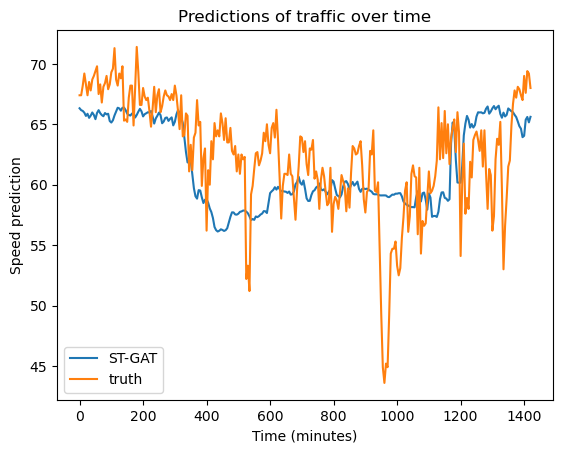

In [70]:
def plot_prediction(test_dataloader, y_pred, y_truth, node, config):
    # Calculate the truth
    s = y_truth.shape
    y_truth = y_truth.reshape(s[0], config['BATCH_SIZE'], config['N_NODE'], s[-1])
    # just get the first prediction out for the nth node
    y_truth = y_truth[:, :, node, 0]
    # Flatten to get the predictions for entire test dataset
    y_truth = torch.flatten(y_truth)
    day0_truth = y_truth[:config['N_SLOT']]


    # Calculate the predicted
    s = y_pred.shape
    y_pred = y_pred.reshape(s[0], config['BATCH_SIZE'], config['N_NODE'], s[-1])
    # just get the first prediction out for the nth node
    y_pred = y_pred[:, :, node, 0]
    # Flatten to get the predictions for entire test dataset
    y_pred = torch.flatten(y_pred)
    # Just grab the first day
    day0_pred = y_pred[:config['N_SLOT']]
    t = [t for t in range(0, config['N_SLOT']*5, 5)]
    plt.plot(t, day0_pred, label='ST-GAT')
    plt.plot(t, day0_truth, label='truth')
    plt.xlabel('Time (minutes)')
    plt.ylabel('Speed prediction')
    plt.title('Predictions of traffic over time')
    plt.legend()
    plt.savefig('predicted_times.png')
    plt.show()
    
_, _, _, y_pred, y_truth = eval(model, device, test_dataloader, 'Test')
plot_prediction(test_dataloader, y_pred, y_truth, 0, config)

# Prediction for Friday

Test, MAE: 1.554315209388733, RMSE: 2.668968439102173, MAPE: 2.984286069869995


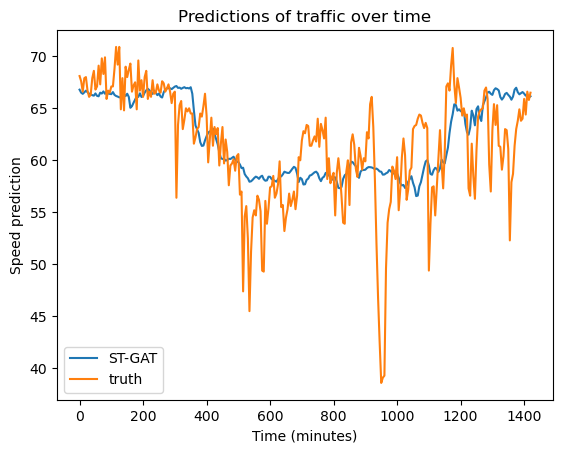

In [72]:
def plot_prediction(test_dataloader, y_pred, y_truth, node, config):
    # Calculate the truth
    s = y_truth.shape
    y_truth = y_truth.reshape(s[0], config['BATCH_SIZE'], config['N_NODE'], s[-1])
    # just get the first prediction out for the nth node
    y_truth = y_truth[:, :, node, 0]
    # Flatten to get the predictions for entire test dataset
    y_truth = torch.flatten(y_truth)
    day1_truth = y_truth[config['N_SLOT']:2*config['N_SLOT']]


    # Calculate the predicted
    s = y_pred.shape
    y_pred = y_pred.reshape(s[0], config['BATCH_SIZE'], config['N_NODE'], s[-1])
    # just get the first prediction out for the nth node
    y_pred = y_pred[:, :, node, 0]
    # Flatten to get the predictions for entire test dataset
    y_pred = torch.flatten(y_pred)
    # Just grab the second day
    day1_pred = y_pred[config['N_SLOT']:2*config['N_SLOT']]
    t = [t for t in range(0, config['N_SLOT']*5, 5)]
    plt.plot(t, day1_pred, label='ST-GAT')
    plt.plot(t, day1_truth, label='truth')
    plt.xlabel('Time (minutes)')
    plt.ylabel('Speed prediction')
    plt.title('Predictions of traffic over time')
    plt.legend()
    plt.savefig('predicted_times.png')
    plt.show()
    
_, _, _, y_pred, y_truth = eval(model, device, test_dataloader, 'Test')
plot_prediction(test_dataloader, y_pred, y_truth, 0, config)